tf.__version__= 2.2.0


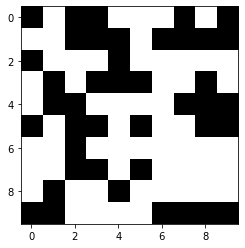

Xraw.shape,Yraw.shape =  (1912, 10, 10) (1912, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('tf.__version__=',tf.__version__)
Xraw = np.load("data.npy")
Xraw.shape
#Yraw = np.load("data_y.npy")
Yraw = np.load("data_y.npy")
plt.imshow(Xraw[len(Xraw)-1], cmap="Greys")
plt.show()
lxraw=len(Xraw)
Xraw=Xraw[int(0.25*lxraw):-1]
Yraw=Yraw[int(0.25*lxraw):-1]
print("Xraw.shape,Yraw.shape = ",Xraw.shape,Yraw.shape)
#print(lxraw)

In [2]:
from sklearn.model_selection import train_test_split
#isplit=int(0.5*(lxraw))
#isplit=1000
#print('isplit=',isplit)
test_size=0.5
#X_train, X_test, y_train, y_test = train_test_split(Xraw[isplit:-1], Yraw[isplit-1], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(Xraw, Yraw, test_size=test_size, random_state=42)

print(np.shape(X_train))
print(np.shape(y_train))

(956, 10, 10)
(956, 2)


In [3]:
img_rows, img_cols = 10, 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_rows, img_cols)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

In [4]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,032
Trainable params: 1,032
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
#SparseCategoricalCrossentropy(#from_logits=True)

In [6]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7374
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.7374
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7374
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7374
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7374


In [8]:
mkdir saved_model

In [9]:
##mkdir -p saved_model
model.save('saved_model/2DIsing.h5')
#mkdir -p saved_model
#model.save('saved_model/2DIsing')
#https://www.tensorflow.org/tutorials/keras/save_and_load

# check code

tf.__version__= 2.2.0


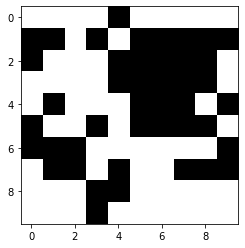

Xraw.shape =  (1912, 10, 10) , Yraw.shape =  (1912, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('tf.__version__=',tf.__version__)

Xraw = np.load('ising_dataset.npz')['x']
Yraw = np.load('ising_dataset.npz')['y']

plt.imshow(Xraw[len(Xraw)-1], cmap="Greys")
plt.show()

lxraw=len(Xraw)
Xraw=Xraw[int(0.25*lxraw):-1]
Yraw=Yraw[int(0.25*lxraw):-1]
print("Xraw.shape = ",Xraw.shape,", Yraw.shape = ",Yraw.shape)

In [2]:
from sklearn.model_selection import train_test_split
#isplit=int(0.5*(lxraw))
#isplit=1000
#print('isplit=',isplit)

test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(Xraw, Yraw, test_size=test_size, random_state=42)

In [3]:
print('----------------------data summary---------------------------------')
print('total data available = ',lxraw)
print('data available for training =',lxraw-int(0.25*lxraw)-1)
print("shape of x_train = ",x_train.shape,"shape of y_train = ",y_train.shape)
print("shape of x_test = ",x_test.shape,"shape of y_test = ",y_test.shape)
print('____________________________________________________________________')

----------------------data summary---------------------------------
total data available =  2550
data available for training = 1912
shape of x_train =  (1529, 10, 10) shape of y_train =  (1529, 2)
shape of x_test =  (383, 10, 10) shape of y_test =  (383, 2)
____________________________________________________________________


In [4]:
img_rows, img_cols = 10, 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_rows, img_cols)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,032
Trainable params: 1,032
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
#SparseCategoricalCrossentropy(#from_logits=True)

In [6]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=20)
print(history.history.keys())

Epoch 1/20
48/48 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.6632 - val_loss: 0.6377 - val_accuracy: 0.9295
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.8613 - val_loss: 0.6132 - val_accuracy: 0.8930
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.8738 - val_loss: 0.6009 - val_accuracy: 0.9164
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.8914 - val_loss: 0.5906 - val_accuracy: 0.9373
Epoch 5/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.9143 - val_loss: 0.5813 - val_accuracy: 0.9504
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.9418 - val_loss: 0.5730 - val_accuracy: 0.9608
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.9424 - val_loss: 0.5658 - val_accuracy: 0.9661
Epoch 8/20
48/48 [==

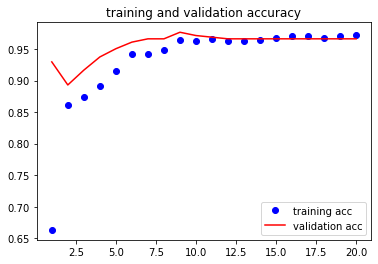

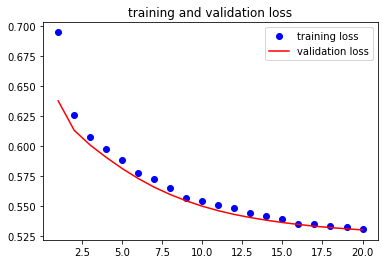

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo',label='training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss, 'bo',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [8]:
import os
os.mkdir ('saved_model')
##mkdir -p saved_model
model.save('saved_model/2DIsing.h5')
#mkdir -p saved_model
#model.save('saved_model/2DIsing')
#https://www.tensorflow.org/tutorials/keras/save_and_load